In [5]:
#Import header
import pandas as pd
pd.options.mode.chained_assignment = None
#file
file_path = 'C:/Users/Tobia/Desktop/DM Projekt/train.csv'
#read csv
df = pd.read_csv(file_path)

In [3]:
#first rows
print(df.head())

                 Dates        Category                      Descript  \
0  2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1  2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2  2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y  
0 -122.425892  37.774599  
1 -122.425892  37.774599  
2 -122.424363  37.800414  
3 -122.426995  37.800873  
4 -122.4387

In [4]:
#datatype
print(df.dtypes)

Dates          object
Category       object
Descript       object
DayOfWeek      object
PdDistrict     object
Resolution     object
Address        object
X             float64
Y             float64
dtype: object


In [5]:
# distribution object type since we dont need min and max for longitude and latitude
print(df.select_dtypes(include=['object']).describe())

                      Dates       Category                      Descript  \
count                878049         878049                        878049   
unique               389257             39                           879   
top     2011-01-01 00:01:00  LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
freq                    185         174900                         60022   

       DayOfWeek PdDistrict Resolution                 Address  
count     878049     878049     878049                  878049  
unique         7         10         17                   23228  
top       Friday   SOUTHERN       NONE  800 Block of BRYANT ST  
freq      133734     157182     526790                   26533  


In [6]:
#check for missingno original data
print('Missing values original data:')
print(df.isnull().sum())

Missing values original data:
Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64


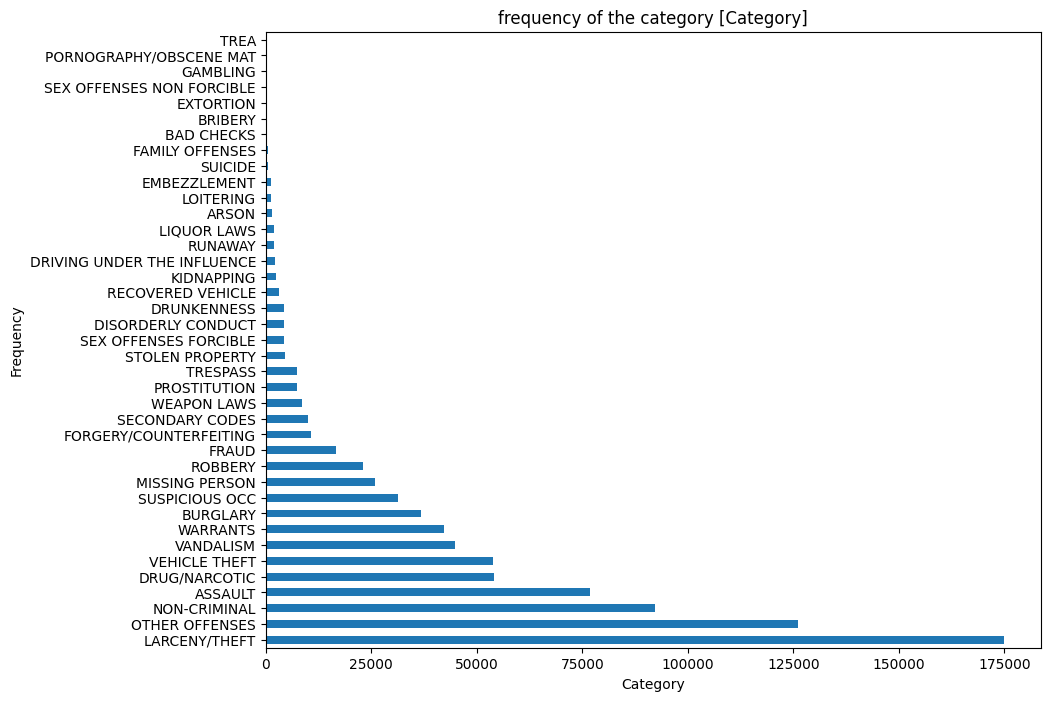

In [7]:
#show the distribution of crimes in the original file to get an overview
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
df['Category'].value_counts().plot(kind='barh')
plt.title('frequency of the category [Category]')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

In [9]:
# since the project only include some of the category's we have to filter the original data
# to do this we simply use an array and simply say that we only want those specific category's in our new df
crimes_we_need = ["LARCENY/THEFT", "ASSAULT", "DRUG/NARCOTIC", "VEHICLE THEFT", "BURGLARY"]
filter_df = df[df['Category'].isin(crimes_we_need)]

print(filter_df.head())

                 Dates       Category                        Descript  \
3  2015-05-13 23:30:00  LARCENY/THEFT    GRAND THEFT FROM LOCKED AUTO   
4  2015-05-13 23:30:00  LARCENY/THEFT    GRAND THEFT FROM LOCKED AUTO   
5  2015-05-13 23:30:00  LARCENY/THEFT  GRAND THEFT FROM UNLOCKED AUTO   
6  2015-05-13 23:30:00  VEHICLE THEFT               STOLEN AUTOMOBILE   
7  2015-05-13 23:30:00  VEHICLE THEFT               STOLEN AUTOMOBILE   

   DayOfWeek PdDistrict Resolution                    Address           X  \
3  Wednesday   NORTHERN       NONE   1500 Block of LOMBARD ST -122.426995   
4  Wednesday       PARK       NONE  100 Block of BRODERICK ST -122.438738   
5  Wednesday  INGLESIDE       NONE        0 Block of TEDDY AV -122.403252   
6  Wednesday  INGLESIDE       NONE        AVALON AV / PERU AV -122.423327   
7  Wednesday    BAYVIEW       NONE   KIRKWOOD AV / DONAHUE ST -122.371274   

           Y  
3  37.800873  
4  37.771541  
5  37.713431  
6  37.725138  
7  37.727564  


In [10]:
# After we filtered our df to the df we need for the project we take another look at the distribution
# We do this because we need to understand the given information about the data in order to further elaborate on it later.
# This also gives us more information about the categorical data, which often consists of a limited number or recurring values.
# By describing this data we can understand the number of unique categories and their frequency in the data set.
print('Distribution after filtering:')
filter_df.select_dtypes(include=['object']).describe()

# As we can see in the Category column, we see that we only have the five predefined categories that we need for our project.
# We can also identify “Theft/Stealing” as the most commonly committed crime, we will study this and validate it later using visualization.
# Additionally, the “Day of the Week” column shows that Friday has the highest crime rate.
# We will also examine this to see what distribution there is over the days of the week in order to extract possible features.


Distribution after filtering:


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address
count,396283,396283,396283,396283,396283,396283,396283
unique,216686,5,267,7,10,17,21077
top,2011-01-01 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,SOUTHERN,NONE,800 Block of BRYANT ST
freq,35,174900,60022,60624,72822,286048,9369


In [11]:
# We decided to check again for missing values, this is not needed because we looked into the whole dataset.
print('Missing values:')
filter_df.isnull().sum()

Missing values:


Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64

In [12]:
# After we filtered the original df we take a look at our filtered df to get an overview.
filter_df

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
5,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431
6,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138
7,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564
...,...,...,...,...,...,...,...,...,...
878036,2003-01-06 00:55:00,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,Monday,NORTHERN,NONE,1300 Block of WEBSTER ST,-122.431046,37.783030
878040,2003-01-06 00:33:00,ASSAULT,INFLICT INJURY ON COHABITEE,Monday,MISSION,NONE,2800 Block of FOLSOM ST,-122.414073,37.751685
878042,2003-01-06 00:20:00,ASSAULT,ATTEMPTED HOMICIDE WITH A GUN,Monday,BAYVIEW,"ARREST, BOOKED",1500 Block of SHAFTER AV,-122.389769,37.730564
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948


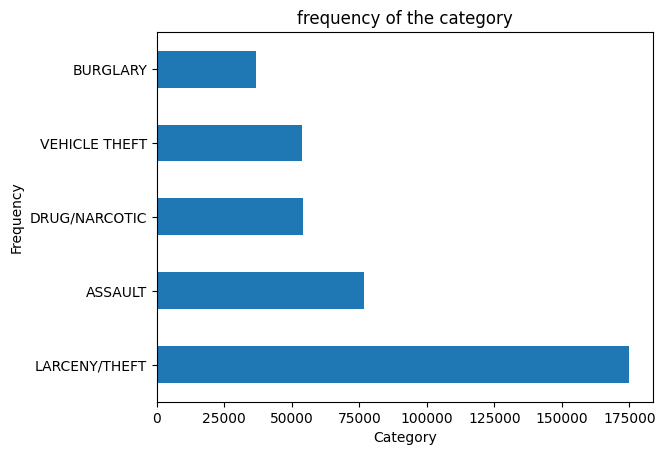

In [13]:
# From looking into the original data and the distribution in "category" we know that "larceny/theft" is the most committed crime
# We don't really need to look into the distribution again but since the plot which includes all category could look a little warped for the eye
# we want to create a new chart that explains the given project task of only looking into specific category's

filter_df['Category'].value_counts().plot(kind='barh')
plt.title('frequency of the category')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

In [36]:
# We want to get an overview of how the criminal cases and how they have developed over time.
# To do this we need to look into the column "dates"
# We notice that the column itself is described as an object, so we have to convert it into datetime.
filter_df['Dates'] = pd.to_datetime(filter_df['Dates'])
# furthermore, we can extract any of the different parts within the date and use them for new columns.
filter_df['year'] = filter_df['Dates'].dt.year
filter_df['quarter'] = filter_df['Dates'].dt.quarter
filter_df['month'] = filter_df['Dates'].dt.month
filter_df['day'] = filter_df['Dates'].dt.day
filter_df['hour'] = filter_df['Dates'].dt.hour
filter_df.dtypes

Dates         datetime64[ns]
Category              object
Descript              object
DayOfWeek             object
PdDistrict            object
Resolution            object
Address               object
X                    float64
Y                    float64
year                   int32
month                  int32
day                    int32
hour                   int32
quarter                int32
dtype: object

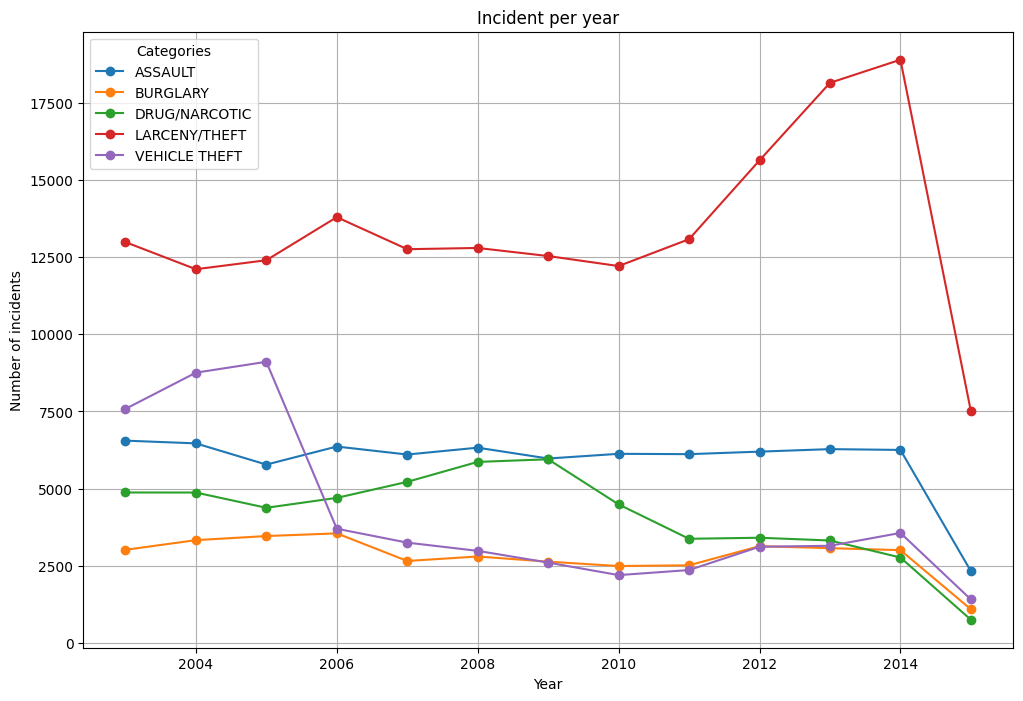

In [32]:
# We could now drop the "dates" column to ease out the data and reduce the complexity for the model,
# but we decided not to do this because we can still use the original "dates" for further analysis, references and correlations or simple visualisation.
# Furthermore, we could also rearrange the columns to have all the extracted information at the front but this is not really needed.
# Let's now look at the development of these category's over time.

grouped = filter_df.groupby(['year', 'Category']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 8))
for category in grouped.columns:
    plt.plot(grouped.index, grouped[category], label=category, marker='o')
plt.title('Incident per year')
plt.xlabel('Year')
plt.ylabel('Number of incidents')
plt.legend(title='Categories')
plt.grid(True)
plt.show()

# This chart already provides a very good overview, but we decided to dig a little deeper into the data and create a line chart for the quarters

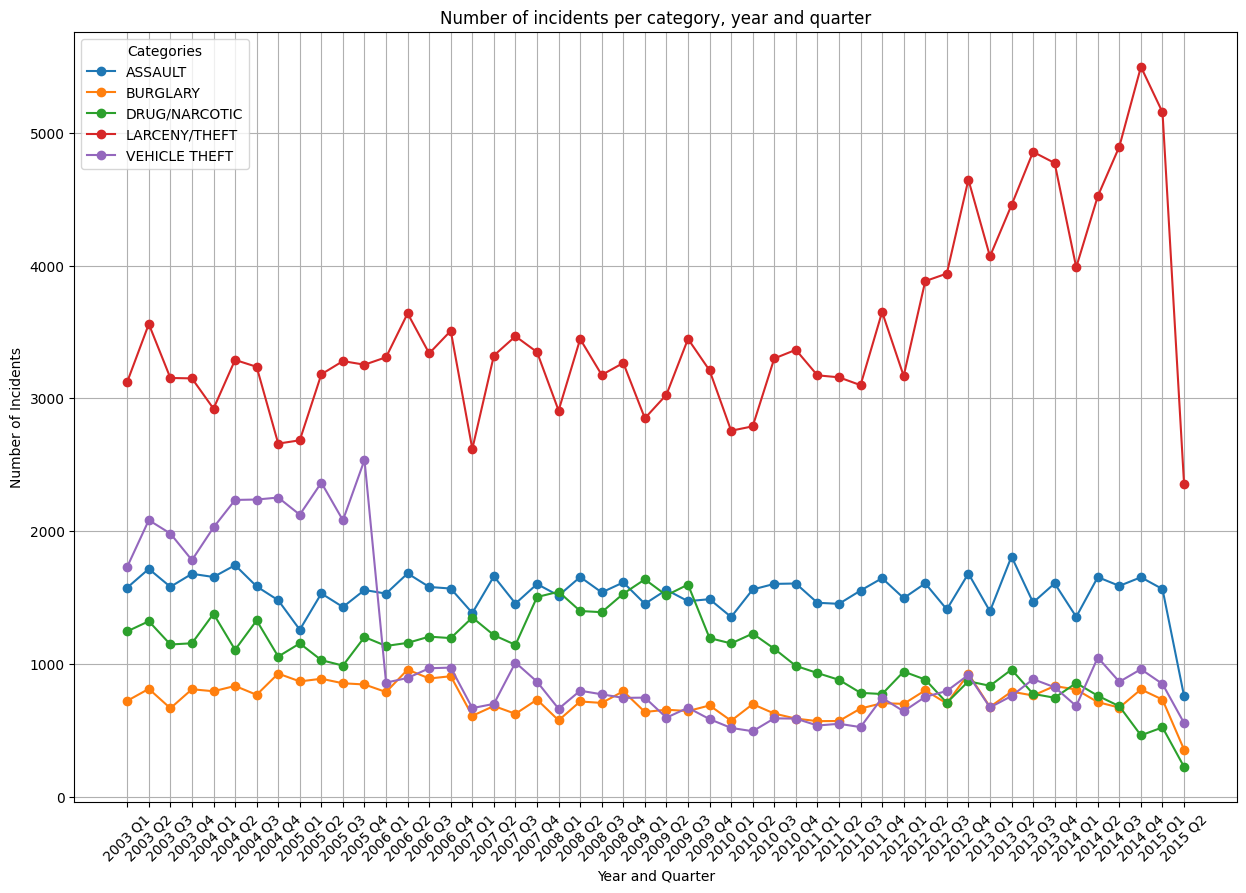

In [57]:
grouped = filter_df.groupby(['year', 'quarter', 'Category']).size()
grouped_df = grouped.unstack('Category', fill_value=0)

# new combined index
grouped_df.index = ['{} Q{}'.format(year, quarter) for year, quarter in grouped_df.index]

# plot
plt.figure(figsize=(15, 10))
for category in grouped_df.columns:
    plt.plot(grouped_df.index, grouped_df[category], label=category, marker='o')

plt.title('Number of incidents per category, year and quarter')
plt.xlabel('Year and Quarter')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.legend(title='Categories')
plt.grid(True)
plt.show()

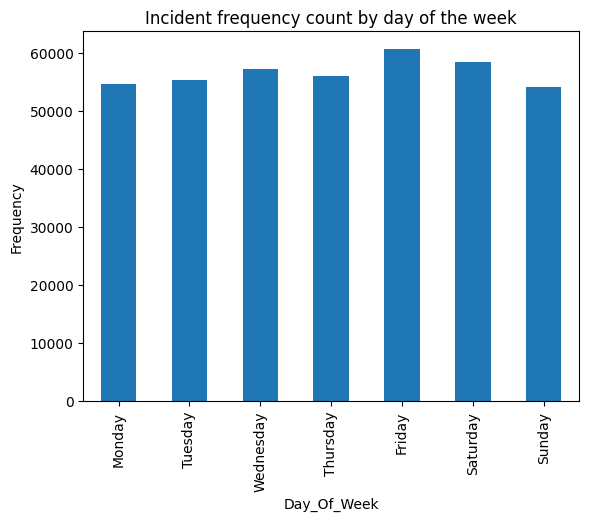

In [14]:
# We could transform dayofweek to numeric to reduce objects.
# To decide between numbers 1-7 and one-hot we have to look into the distribution.
# If we use numbers 1-7 the model could think that this implies some kind of ranking system.
# Since we don't want that to happen we have to explore the data as mentioned.


# plot
# create order
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Incident frequency count by day of the week
icident_frequency = filter_df['DayOfWeek'].value_counts()
icident_frequency = icident_frequency.reindex(days_order)

icident_frequency.plot(kind='bar')
plt.title('Incident frequency count by day of the week')
plt.xlabel('Day_Of_Week')
plt.ylabel('Frequency')
plt.show()

# The diagram shows a relatively even distribution.
# Only on Friday was there a slightly larger increase in incidents.
# Now that could mean that there is no real connection between the days and the incidents.
# Since the number of incidents per day is relatively similar and there is no clear trend or order,
# we think that one-hot encoding is a better choice. It allows the model to learn independent patterns for each day without assuming a specific order.
# This would of course increase the complexity of the model.
# To further elaboration we can test the correlation.

In [ ]:
# The map display makes it possible to identify geographical patterns and clusters of incidents.
# This can reveal whether certain types of incidents are more common in specific geographical areas.
# Taking spatial data into account is also crucial for subsequent classification using machine learning:
# This provides significant support for identifying relevant features and improving the accuracy of machine learning models.
# Visual contextualization on a map can reveal patterns and relationships that may not be obvious in a purely tabular representation.
# This supports informed decision-making and helps develop effective strategies and actions based on the analyzed data.

import plotly.express as px
fig = px.scatter_mapbox(filter_df, lat='Y', lon='X', color='Category',title='Distribution of Crimes in SF',
                        hover_name='Category',
                        zoom=11,width=1000,height=850,)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# The map won't show in pycharm, so we have to safe it as a html file.
# It may work in the jupyter notebook export, so we leave the fig.show.
#fig.write_html("C:/Users/Tobia/Desktop/DM Projekt/Distribution of Crimes in SF.html")
fig.show()

In [4]:
# The map shows that we have some points outside of SF.
# Since we use XGBoost and SVM we have to look into the outliers as their sensitivity depends on the specific data and problem
# For SVM:
#   SVM can be sensitiv to outliers, especially if we want to use kernel tricks.
#   The SVM aims to find the optimal hyperplane that separates the classes, therefore an outline can significantly influence the position of this layer.
#   As we stated before the sensitivity also depends on the kernel and regularization parameters we like to use.
#   A stronger regularization parameter can help to reduce this impact together with proper feature scaling wich uses geometric distances between the datapoints.
# For RFC:
#   RFC on the other hand are generally considered robust against outliers because they rely on decision trees that make subdivisions in the data.
#   Because RFC is trained on a random subset of data, outliers have little impact.
#   Unlike SVM, Random Forests do not require feature scaling as they are not based on distance measurements.
#   Therefore, outliers in feature values have less impact on the performance of a random forest model.
# To sum this up we could leave the outliers if we only work with RFC, but because we use SVM as well we cannot ignore them.
# Regardless of the model chosen, it's always a good practice to examine and clean the data to archive the best results.

# There are a view different ways to handle outliers we will cover a few.
# Removing outliers:
#   With this approach we would risk to lose important information, especially if outliers are actually relevant data.
# Transforming the data:
#   We could try to normalize the distribution, but it could be challenging to interpret the transforming data
# Replacing:
#   We could replace the values with for example with measures of central tendency or other, but this could result in data distortion.
# Since we cannot cover all methods we stop here.
# We came to the conclusion that it would be the easiest way to simply remove the outliers.
# The visualisation shows that we only have a view outliers and that those are not located inside SF therefore we think it wouldn't impact the model too much in a bad way.


In [20]:
# To remove the outliers we could quickly go through the .csv and delete those entry's.
# We decided to go the extra mile my looking up the longitude and latitude from SF.
# We found out that SF is located approximately between latitudes 37.7070 and 37.8324 and longitudes -122.5149 and -122.3647.
# These values may vary slightly depending on the exact boundaries we want to consider.
# According, to the borders we also found a few points outside of SF. Since we only want those in SF we will remove those too.
# With this information we can simply manipulate the variables and drop any entry that is beyond our and SF boundaries.

min_lat, max_lat = 37.70827, 37.80966
min_lon, max_lon = -122.5149, -122.3647

filter_df_reset = filter_df.reset_index(drop=True)
filter_df = filter_df_reset[(filter_df_reset['Y'] >= min_lat) & (filter_df_reset['Y'] <= max_lat) &
                            (filter_df_reset['X'] >= min_lon) & (filter_df_reset['X'] <= max_lon)]



In [25]:
# and create a new map plot to see if everything went accordingly
import plotly.express as px
fig = px.scatter_mapbox(filter_df, lat='Y', lon='X', color='Category',title='Distribution of Crimes in SF',
                        hover_name='Category',
                        zoom=11,width=1000,height=850,)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.write_html("C:/Users/Tobia/Desktop/DM Projekt/Killed outliers map.html")
#fig.show()

# The new map shows the cleaned data.
# If we look at the boarders of SF we can see that we no longer have crimes from Daly City mixed in our data.
# We have taken into account that these data points may not have a large impact on the model itself.
# However, we still decided to remove these points because we wanted to work with data that was only obtained from SF, as this best represents SF.